In [1]:
import numpy as np
import pylab as plt
import os,sys, struct

In [53]:
# distances for contacts
distmin=1
distmax=50

# base directory on local computer, which should/could sync with Google Drive
rpb = '/Users/neyrinck/Google Drive/My Drive/'

#rpb_suf is a suffix directing to either Mark's or Pre-Mark runs
#rpb_suf = 'proteins'                            #Mark's runs
rpb_suf = '0_DUF1220_202208/0_AlphaFold_results' #Pre-Mark/Tim's runs.
            #Space ' ' missing from Howard's original directory name
respath=rpb+rpb_suf+'/'
reslist=np.sort(os.listdir(respath))
print(reslist[:5])
analyzethis=np.zeros(len(reslist),dtype=bool)

#tag the models with 'analyzethis = True' that have a 'best_model' (i.e. are done)
for di in range(len(reslist)):
    if os.path.exists(respath+reslist[di]+'/best_model.pdb'):
        analyzethis[di] = True

['.DS_Store' '0_ALPHAFOLD2_CHIMERAX_IMAGES' '0_ChimeraX' '0_Obsolete'
 "0_TimHolme's code for GoogleGColab and Chimerax 2023.pdf"]


In [46]:
print(reslist[np.where(analyzethis == False)])
#directory members without a '/best_model.pdb'

['.DS_Store' '0_ALPHAFOLD2_CHIMERAX_IMAGES' '0_ChimeraX' '0_Obsolete'
 "0_TimHolme's code for GoogleGColab and Chimerax 2023.pdf"
 '20230129 X CON2.cxs' 'AA128_results' 'AA142_results' 'AA143_results'
 'AB142_results' 'AB143_results' 'Alphafold extracted results'
 'CACNA1C - Voltage-dependent L-type calcium channel subunit alpha-1C - Homo sapiens (Human) _ UniProtKB _ UniProt.html'
 'CACNA1C - Voltage-dependent L-type calcium channel subunit alpha-1C - Homo sapiens (Human) _ UniProtKB _ UniProt_files'
 'COLABFOLD_READY'
 'CON1 93aa Hemoglobin MBB P68871 147 some contact at one end of c1 .cxs'
 'ChimeraX mostly or all obsolete' 'Chimerax '
 'Save incorrect Row 128 and 135 but not 123' 'T110.csv' 'T142_results'
 'T143_results' 'Tubulin' 'U142_results' 'U143_results' 'U152.done.txt'
 'V142_results' 'V143_results' 'W142_results' 'W143_results'
 'X133 ACHA7 Rett 502  CON2 72 binds acetylcholine opens ion channel 0 contacts I81-83.cxs'
 'X142_results' 'X143_results' 'Y142_results' 'Y143_resu

In [47]:
#directory members with a '/best_model.pdb'
print(reslist[np.where(analyzethis)])

['AA110_results' 'AA111_results' 'AA112_results' 'AA113_results'
 'AA114_results' 'AA115_results' 'AA116_results' 'AA117_results'
 'AA118_results' 'AA119_results' 'AA120_results' 'AA121_results'
 'AA122_results' 'AA124_results' 'AA125_results' 'AA126_results'
 'AA127_results' 'AA129_results' 'AA130_results' 'AA131_results'
 'AA132_results' 'AA133_results' 'AA134_results' 'AA136_results'
 'AA137_results' 'AA138_results' 'AA140_results' 'AA141_results'
 'AA144_results' 'AA145_results' 'AA146_results' 'AB110_results'
 'AB111_results' 'AB112_results' 'AB113_results' 'AB114_results'
 'AB115_results' 'AB116_results' 'AB117_results' 'AB118_results'
 'AB119_results' 'AB120_results' 'AB121_results' 'AB122_results'
 'AB124_results' 'AB125_results' 'AB126_results' 'AB127_results'
 'AB129_results' 'AB130_results' 'AB131_results' 'AB132_results'
 'AB133_results' 'AB134_results' 'AB136_results' 'AB137_results'
 'AB138_results' 'AB140_results' 'AB141_results' 'AB144_results'
 'AB145_results' 'AB146_r

In [52]:
# This will be the script to run in ChimeraX, after it is output.
# At the ChimeraX prompt, run PATH/makepicturefile
# (where PATH is the path where this notebook .ipynb is)

makepicturefile = 'proteins/makepictures.cxc'
F = open(makepicturefile,'w')

# define an alias picmovie that writes a pic and a movie
# save a picture. $1, $2 and $3 are arguments passed to picmovie, for path names and file desciptors
F.write('alias picmovie view orient ; save "/Users/neyrinck/Google Drive/My Drive/$1/$2/$2_$3.jpg" supersample 2 ; ')
# save a 'wobble' movie
F.write('movie record ; wobble y 90 aspect 1 ; wait 180 ; movie encode "/Users/neyrinck/Google Drive/My Drive/$1/$2/$2_$3_wob.mp4" ; stop ; ')
# save a 'turn' movie
F.write('movie record ; turn y 2 180 ; wait 180 ; movie encode "/Users/neyrinck/Google Drive/My Drive/$1/$2/$2_$3_rot.mp4"\n')

# write a 'makepicture' alias, to be run for each model. All on one line, making harder to human-parse.
# No idea why, but pre-Mark results had /B and /C ChimeraX labels for the two dimers;
# Mark's results have /A and /B
if rpb_suf == '0_DUF1220_202208/0_AlphaFold_results':
    dim1 = '/B'; dim2 = '/C'
elif rpb_suf == 'proteins':
    dim1 = '/A'; dim2 = '/B'
# white background, window size
F.write('alias makepicture close ; set bgColor white ; windowsize 480 480 ;')
# open files, set standard view
F.write('open "%s/$1/$2/best_model.pdb" ; alphafold pae #1 file "%s/$1/$2/best_model_pae.json" ; '%(rpb,rpb))
F.write('view orient ; sequence chain #1%s ; sequence chain #1%s ;')
# contacts_hbonds view 
F.write('color bychain ; color %s indianred ; color %s royalblue ; alphafold contacts %s to %s palette paegreen ; '%(dim1,dim2, dim1,dim2))
F.write('hbonds %s reveal true restrict %s color fuchsia radius 0.8 dashes 2 ; picmovie $1 $2 contacts_hbonds ; '%(dim1,dim2))
# sphere
F.write('style sphere ; show atoms ; picmovie $1 $2 sphere ; ')
# coloumbic
F.write('style nucleic stick ; hide atoms ; coulombic key true ; picmovie $1 $2 coulombic ; ')
# hydrophobic
F.write('style nucleic stick ; hide atoms ; mlp key true ; picmovie $1 $2 hydrophobic\n')

# run 'makepicture' for each model that exists
for di in range(len(reslist)):
    if analyzethis[di]:
        F.write('makepicture %s %s\n'%(rpb_suf,reslist[di]))
F.close()

In [50]:
# code for converting .html log files to .txt, for contact number vs distance analysis
# requires lynx text web browser
for di in range(len(reslist)):
    if analyzethis[di]:
        print(respath+reslist[di])
        os.system('cd "%s"; lynx -dump bonddistance.html >& fullbd.txt ; tail +5 fullbd.txt > bonddistance.txt'%(respath+reslist[di]))
        os.system('')

/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA110_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA111_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA112_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA113_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA114_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA115_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA116_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA117_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA118_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA119_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/AA120_results
/Users/neyrinck/Googl

/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U120_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U121_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U122_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U124_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U125_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U126_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U127_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U129_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U130_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U131_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/U132_results
/Users/neyrinck/Google Drive/My 

/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/X140_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/X141_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/X144_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/X145_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/X146_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/Y110_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/Y111_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/Y113_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/Y114_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/Y115_results
/Users/neyrinck/Google Drive/My Drive/0_DUF1220_202208/0_AlphaFold_results/Y116_results
/Users/neyrinck/Google Drive/My 

In [73]:
# parsing of contacts/distance relationship log file

numresults = np.sum(analyzethis.astype(int))
atoms = np.zeros(numresults,dtype=int)
bonds = np.zeros(numresults,dtype=int)
residues = np.zeros(numresults,dtype=int)
pbonds = np.zeros((numresults,distmax+1-distmin),dtype=int)

ri = 0
for di in np.arange(len(reslist)):
    if analyzethis[di]:
        print(reslist[di])
        #parse log file
        F=open(respath+reslist[di]+'/bonddistance.txt','r')
        lines=F.readlines()
        head = lines[0].split()
        atoms[ri] = int(head[0])
        bonds[ri] = int(head[2])
        residues[ri] = int(head[4])
        dist = 1
        #remember we have to subtract 1 to get the index of pbonds getting the value
        for li in np.arange(1,len(lines)):
            if 'Nothing selected' in lines[li]:
                bondsinline = 0 
                pbonds[ri,dist-1] = bondsinline
                dist += 1
            else:
                line = lines[li].strip().split()
                if (line[0] == '[Repeated'):
                    #jnkjn
                    pbonds[ri,dist-1:dist-1+int(line[1])] = bondsinline #previous result
                    dist += int(line[1])
                    if len(line) > 3:
                        bondsinline = int(line[2][8:])
                        pbonds[ri,dist-1] = bondsinline
                        dist += 1
                else:
                    bondsinline = int(line[0])
                    pbonds[ri,dist-1] = bondsinline
                    dist += 1
        ri += 1
            
        

AA110_results
AA111_results
AA112_results
AA113_results
AA114_results
AA115_results
AA116_results
AA117_results
AA118_results
AA119_results
AA120_results
AA121_results
AA122_results
AA124_results
AA125_results
AA126_results
AA127_results
AA129_results
AA130_results
AA131_results
AA132_results
AA133_results
AA134_results
AA136_results
AA137_results
AA138_results
AA140_results
AA141_results
AA144_results
AA145_results
AA146_results
AB110_results
AB111_results
AB112_results
AB113_results
AB114_results
AB115_results
AB116_results
AB117_results
AB118_results
AB119_results
AB120_results
AB121_results
AB122_results
AB124_results
AB125_results
AB126_results
AB127_results
AB129_results
AB130_results
AB131_results
AB132_results
AB133_results
AB134_results
AB136_results
AB137_results
AB138_results
AB140_results
AB141_results
AB144_results
AB145_results
AB146_results
T110_results
T111_results
T112_results
T113_results
T114_results
T115_results
T116_results
T117_results
T118_results
T119_results
T1

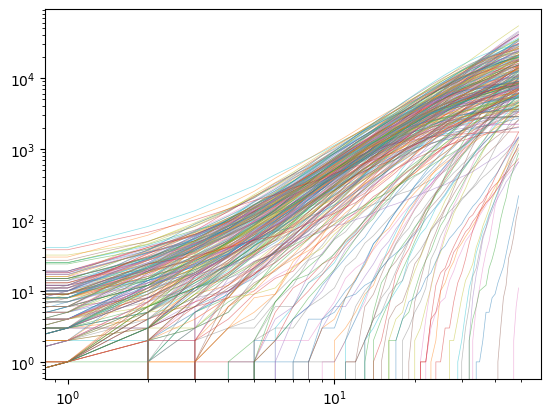

In [76]:
# various plots of results

for i in range(numresults):
    #plt.plot(np.log1p(pbonds[i,:]),lw=0.5,alpha=0.5)
    plt.loglog(pbonds[i,:],lw=0.5,alpha=0.5)

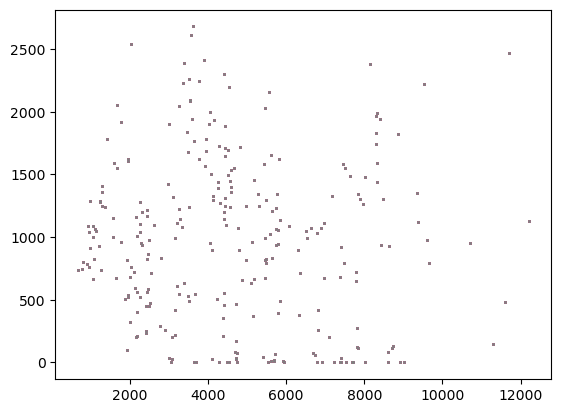

In [43]:
for i in range(numresults):
    plt.scatter(atoms,np.mean(pbonds,axis=1),s=1)

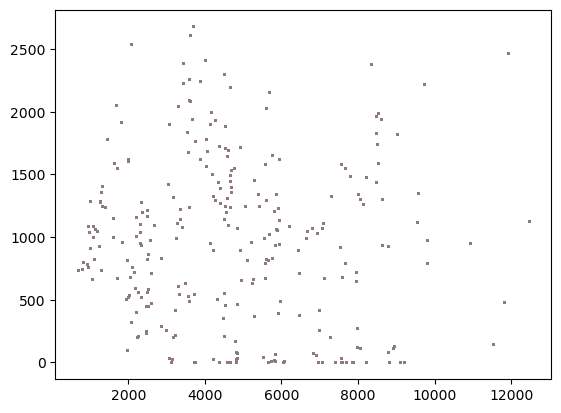

In [44]:
for i in range(numresults):
    plt.scatter(bonds,np.mean(pbonds,axis=1),s=1)

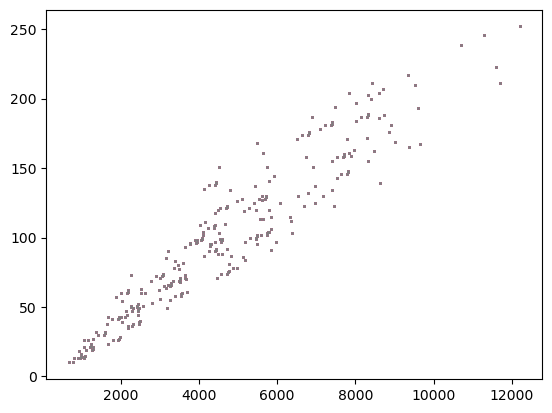

In [48]:
for i in range(numresults):
    plt.scatter(atoms,bonds-atoms,s=1)